<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/k_fold_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

In [3]:
#reproducibility
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/datasets/pima-indians-diabetes.csv", delimiter=",")
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
import pandas as pd

In [10]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/datasets/pima-indians-diabetes.csv', delimiter=',')
diabetes.dataframeName = 'pima-indians-diabetes'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

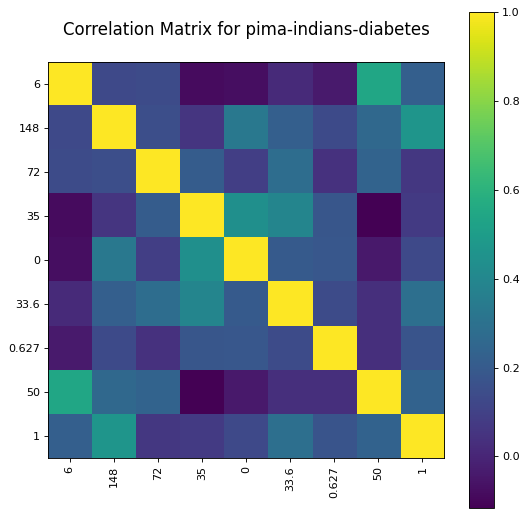

In [11]:
plotCorrelationMatrix(diabetes, 8)

In [12]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [13]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 72.73%
accuracy: 77.92%
accuracy: 74.03%
accuracy: 72.73%
accuracy: 67.53%
accuracy: 61.04%
accuracy: 68.83%
accuracy: 76.62%
accuracy: 75.00%
accuracy: 80.26%
72.67% (+/- 5.33%)
